In [24]:
%run util.py

# Van der Pol Oscillator

The Van der Pol Oscillator is given by the following 2D ODE System

$$
\begin{align}
x' &= y \\
y' &= -x + \mu (1-x^2)y
\end{align}
$$

This system can be converted into a second order ODE (TODO: Show how),

$$
y'' - \mu(1 - x^2)y' + y = 0
$$

This is "almost" a linear 2nd order ODE

$$
y'' + ay' + y = 0
$$

This has solutions of the form $y(t) = c_1 e^{r_1 t} + c_2 e^{r_2 t}$ with the roots gven by the characteristic equation

$$
r^2 + a r + 1 = 0 \rightarrow r_{1,2} = -\frac{a}{2} \pm \sqrt{\frac{a^2}{4} - 1}
$$

If $\frac{a^2}{4} < 1$, the term in the root becomes negative and we obtain an oscillation. For the damping however, the sign of $a$ is relevant: If $a > 0$, the oscillation has increasing amplitude, for $a < 0$ the oscillation is decreasing.

In [20]:
mu = 2.0

In [21]:
def dX_dt(X, t=0):
    return np.array([X[1],
                     -X[0] + mu*X[1]*(1-X[0]**2) ])

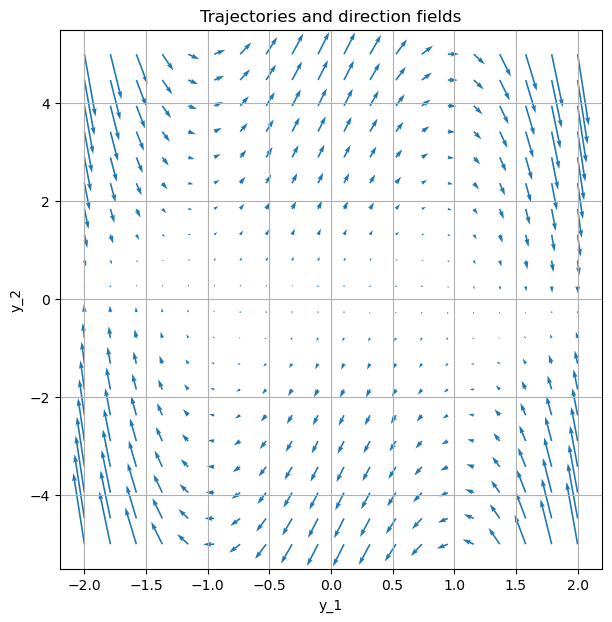

In [22]:
vField(-2, 2, -5, 5, dX_dt, Norm = False)

In [23]:
tmax = 50
t = np.linspace(0, tmax, 200)
X, infodict = solveODE(dX_dt, [0., 0.1], t)
infodict['message']

'Integration successful.'

Text(0, 0.5, '$y$')

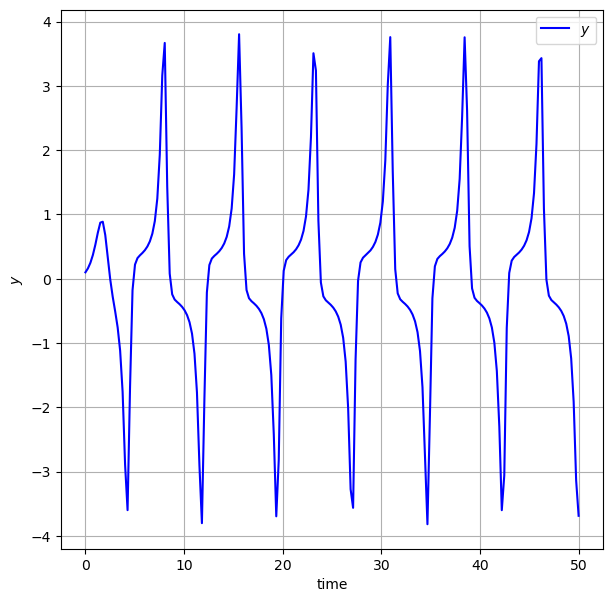

In [24]:
y1, y2 = X.T

# plt.plot(t, y1, 'r-', label='$x$')
plt.plot(t, y2  , 'b-', label='$y$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$y$')

Below we (try to) plot the limit cycle. Since the system lands in the limit cycle eventually, we just wait some time (which we obtained empirically) and then plot $y_2$ against $y_1$.

We observe areas where the signal rapidly changes (few points plotted) for $|y| > 1$ and areas where the signal changes very slowly (many points plotted) for $|y|<1$.

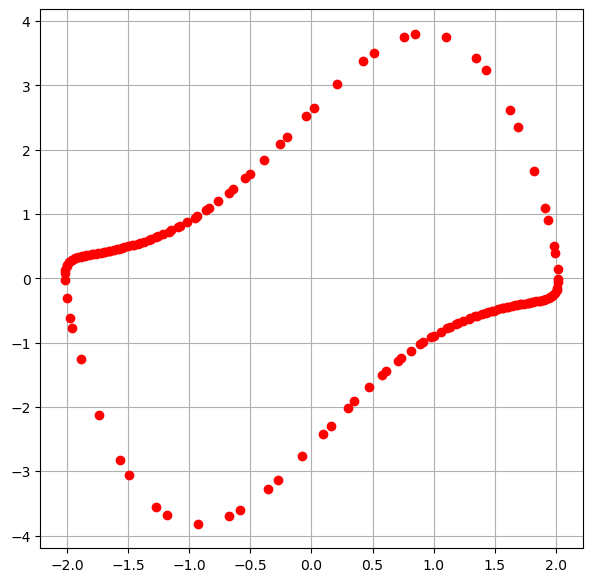

In [25]:
plt.plot(y1[50:], y2[50:], 'ro')
plt.grid(True)

To illustrate this better, we cobine the plot above with a contour plot of the **absolute** change; ie $\sqrt{x'^2 + y'^2}$. We observe that the fast-changing areas of the $y_1 - y_2$ plot coincide with areas of large absolute change, whereas the slow-changes areas conincide with areas of small absolute changes which confirms the intuition.

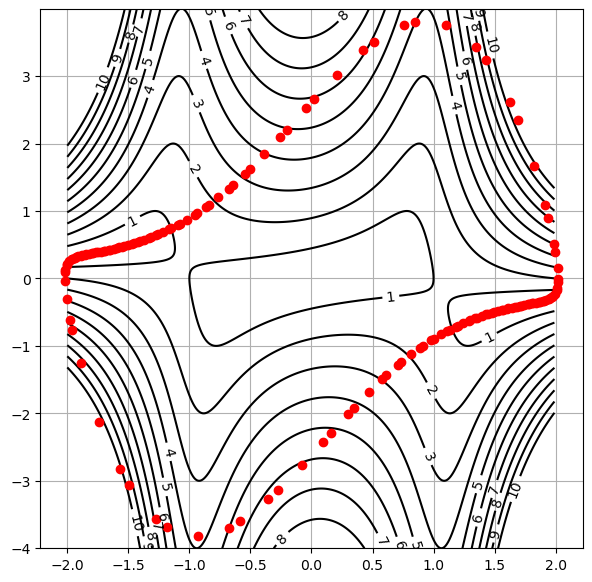

In [26]:
delta = 0.01
x = np.arange(-2.0, 2.0, delta)
y = np.arange(-4.0, 4.0, delta)
X, Y = np.meshgrid(x, y)

Z = np.sqrt(Y**2 + (-X + mu*(1 - X**2)*Y)**2)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.linspace(0,10,11), colors='k')
ax.clabel(CS, inline=True)
ax.grid(True)
ax.plot(y1[50:], y2[50:], 'ro')

The Jacboi matrix is given by

$$
J = \begin{pmatrix} 0 & 1 \\ -1 & \mu \end{pmatrix}
$$

The eigenvalues are $(0 - \lambda)(\mu - \lambda) + 1 = 0$ from which follows

$$
\lambda_{1,2} = \frac{\mu}{2} \pm \sqrt{\frac{\mu^2}{4} - 1}
$$

For $\mu > 0$, the fixed point is stable

In [27]:
A = np.array([[0., 1.], [-1., mu]])
lin.eig(A)

(array([1.+0.j, 1.+0.j]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]))

## Change of Variables

The book makes a variable change: With $F(x) = \frac{1}{3} x^3 - x$ we obtain a new ODE system as

$$
\begin{align}
x' &= \mu \left( y - F(x) \right) \\
y' &= - \frac{1}{\mu} x
\end{align}
$$

Let's plot the corresponding phase plane next.

In [65]:
mu = 5.0

In [67]:
def dX_dt(X, t=0):
    return np.array([mu*( X[1] - (1/3*X[0]**3 - X[0])),
                     -1/mu * X[0] ])

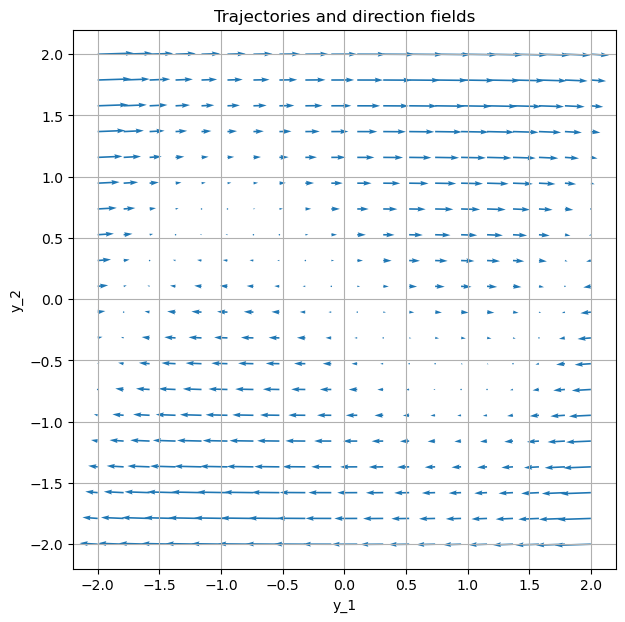

In [69]:
vField(-2, 2, -2, 2, dX_dt, Norm = False)

In [80]:
tmax = 12
t = np.linspace(0, tmax, 100)
X, infodict = solveODE(dX_dt, [0., 0.1], t)
infodict['message']

'Integration successful.'

Text(0, 0.5, '$y$')

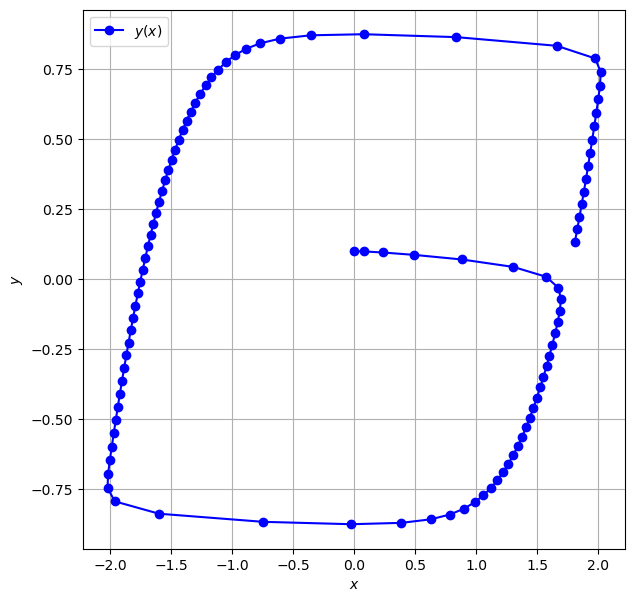

In [82]:
y1, y2 = X.T

plt.plot(y1, y2  , 'bo-', label='$y(x)$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('$x$')
plt.ylabel('$y$')

From the above plots, we can see that the high-velocity part between $-1 \leq x \leq 1$ and the low velocity part between $-2 \leq x \leq -1$.

## Different Damping Term

The $-\mu(1-x^2)$ term is a non-linear damping term which depends on $x$. It changes sign at $|x|=1$: For $|x| > 1$, the damping term $-\mu(1-x^2) > 0$ which corresponds to an increasing oscillation (negative damping). For $|x| < 1$, the term is negative which corresponds to decreasing oscillation.

Starting at a small value of $x$, the oscillator experiences negative damping and the amplitude increases. If the oscillation exceeds $|x| = 1$, the damping becomes positive, thereby reducing the amplitude again. It is this change of damping which causes the oscillations.

In this Section we play around with other nonlinear damping functions.

In [35]:
def damp(x):
    # return(1 - abs(x))
    return(1 - x**4)

In [36]:
def dX_dt(X, t=0):
    return np.array([X[1],
                     -X[0] + mu*X[1]*damp(X[0]) ])

In [37]:
tmax = 20
t = np.linspace(0, tmax, 200)
X_d, infodict = solveODE(dX_dt, [0., 0.1], t)
infodict['message']

'Integration successful.'

Text(0, 0.5, '$y$')

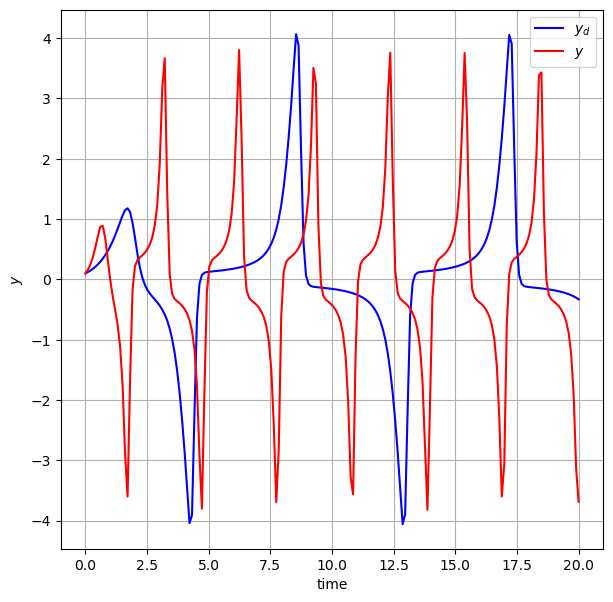

In [38]:
y1_d, y2_d = X_d.T

# plt.plot(t, y1, 'r-', label='$x$')
plt.plot(t, y2_d  , 'b-', label='$y_d$')
plt.plot(t, y2  , 'r-', label='$y$')

plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$y$')

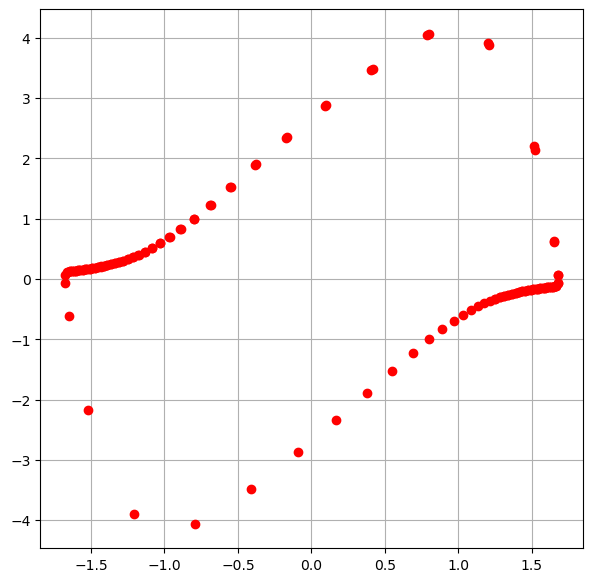

In [39]:
plt.plot(y1_d[50:], y2_d[50:], 'ro')
plt.grid(True)

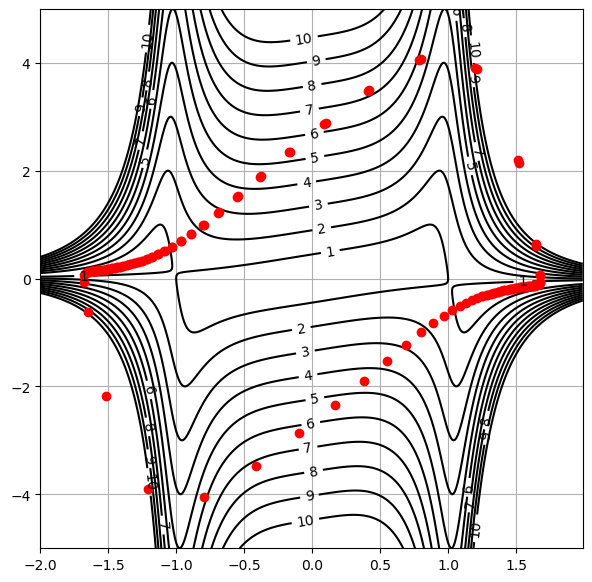

In [42]:
delta = 0.01
x = np.arange(-2.0, 2.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)

Z = np.sqrt(Y**2 + (-X + mu*damp(X)*Y)**2)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.linspace(0,10,11), colors='k')
ax.clabel(CS, inline=True)
ax.grid(True)
ax.plot(y1_d[50:], y2_d[50:], 'ro')